# Random Forest Classifier

In [3]:
from datasets import load_dataset
import tqdm as tqdm

regression_dataset_tmdb_raw_df = load_dataset("ada-datadruids/regression_dataset_tmdb")['train'].to_pandas()

print(len(regression_dataset_tmdb_raw_df))
regression_dataset_tmdb_raw_df.head()

8353


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,based_on_book
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",False
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",False
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",False
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",False
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",False


In [4]:
from utils.regression_utils import adjust_for_inflation

regression_dataset_tmdb_raw_df = adjust_for_inflation(regression_dataset_tmdb_raw_df, ['budget', 'revenue'], is_plotting_enabled=False)
regression_dataset_tmdb_raw_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,based_on_book,movie_year,adjusted_budget,adjusted_revenue
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",False,2010,1.737071e+08,8.962556e+08
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",False,2014,1.650000e+08,7.017292e+08
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",False,2008,2.034170e+08,1.104564e+09
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",False,2009,2.615235e+08,3.226236e+09
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",False,2012,2.268438e+08,1.566063e+09


We will keep the budget here

In [5]:
from utils.regression_utils import multi_one_hot_encode_columns

# Might want to keep release data in the future???
# production companies removed as there are over 100'000 unique values
regression_dataset_tmdb_raw_df.drop(columns=['keywords', 'id', 'title', 'release_date', 'backdrop_path', 'homepage', 'original_title','budget', 'overview', 'poster_path', 'tagline', 'production_companies', 'original_language', 'revenue', 'imdb_id'], inplace=True)

regression_dataset_processed_df = multi_one_hot_encode_columns(
    regression_dataset_tmdb_raw_df,
    column_names_mohe=['genres', 'spoken_languages', 'production_countries'], # keywords not taken for now
    column_names_ohe=['status'],
)


In [6]:
regression_dataset_processed_df.head()

,vote_average,vote_count,runtime,adult,popularity,based_on_book,movie_year,adjusted_budget,adjusted_revenue,genres_count,...,production_countries_China,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Russia,production_countries_Spain,production_countries_United Kingdom,production_countries_United States of America
0,8.364,34495,148,False,83.952,False,2010,1.737071e+08,8.962556e+08,3,...,0,0,0,0,0,0,0,0,1,1
1,8.417,32571,169,False,140.241,False,2014,1.650000e+08,7.017292e+08,3,...,0,0,0,0,0,0,0,0,1,1
2,8.512,30619,152,False,130.643,False,2008,2.034170e+08,1.104564e+09,4,...,0,0,0,0,0,0,0,0,1,1
3,7.573,29815,162,False,79.932,False,2009,2.615235e+08,3.226236e+09,4,...,0,0,0,0,0,0,0,0,1,1
4,7.710,29166,143,False,98.082,False,2012,2.268438e+08,1.566063e+09,3,...,0,0,0,0,0,0,0,0,0,1


## Not separated if based on book or not

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.model_selection import KFold

In [9]:
from utils.regression_utils import create_train_test_split
# DATA PREPROCESSING
X_train, X_test, y_train, y_test = create_train_test_split(
    regression_dataset_processed_df, 
    target_column='adjusted_revenue', 
    should_split_based_on_book=False, 
    test_size=0.2, 
    seed=42
)['all']

In [ ]:
# HYPERPARAMETERS

param_grid = {

    'n_estimators': [100, 150, 200, 300],

    'max_depth': [5, 10, 15, 20, 30],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4],
 
    'bootstrap': [True]

}

model = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_params = grid_search.best_params_
print('Best parameters:', best_params)


Best parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Validation error (MSE): 2.555314891123762e+16
R^2 Score: 0.4250923314880286


In [44]:
# Train final model with best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train.ravel())

predictions = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 159853523.29941815
R^2 Score: 0.4250923314880286


                                          Feature  Importance
2                                      vote_count    0.459992
7                                      movie_year    0.207119
8                                 adjusted_budget    0.135721
3                                         runtime    0.058387
5                                      popularity    0.039074
1                                    vote_average    0.028151
11                               genres_Adventure    0.025599
9                                    genres_count    0.004967
17                                  genres_Family    0.003497
27                         spoken_languages_count    0.003465
23                                 genres_Romance    0.003210
13                                  genres_Comedy    0.002851
36                       spoken_languages_Spanish    0.002487
24                         genres_Science Fiction    0.002356
37                     production_countries_count    0.002354
16      

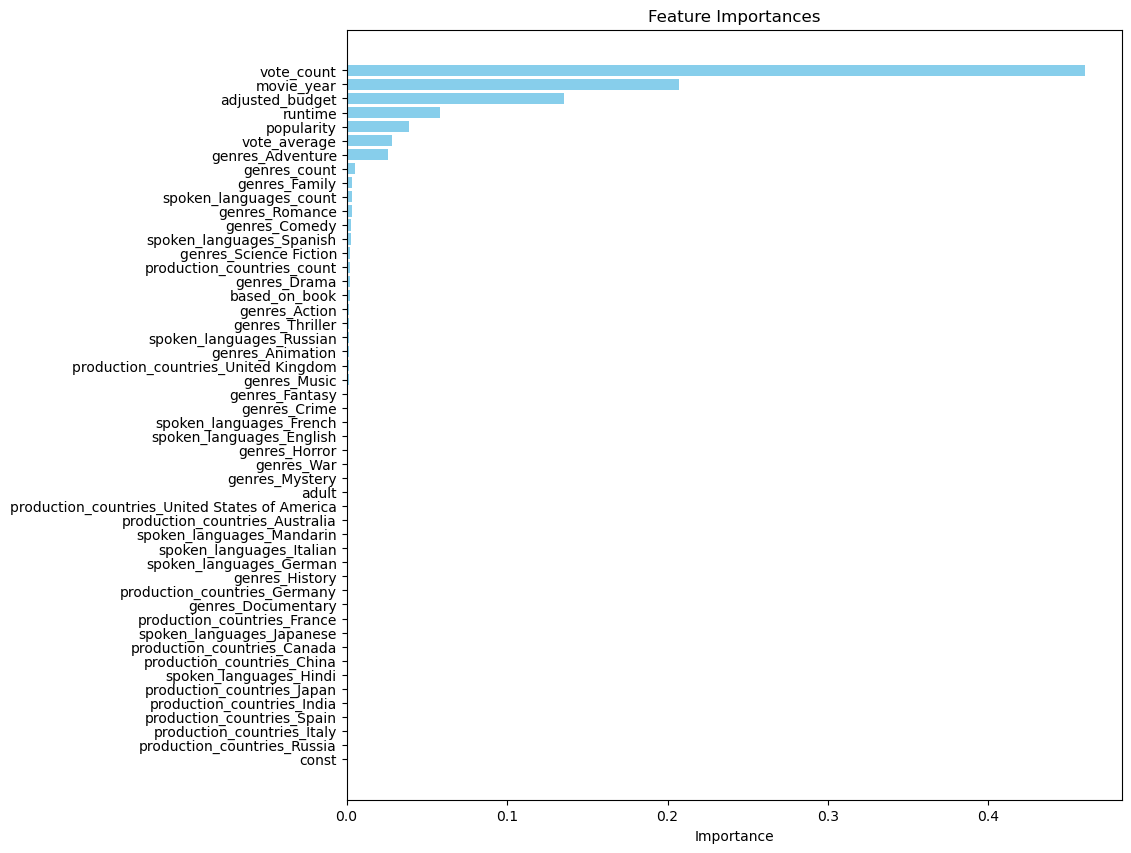

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## Separated for based on Book

In [10]:
split_dict = create_train_test_split(
    regression_dataset_processed_df,
    target_column='adjusted_revenue',
    should_split_based_on_book=True,
    test_size=0.2,
    seed=42
)
X_train_based_on_book, X_test_based_on_book, y_train_based_on_book, y_test_based_on_book = split_dict['based_on_book']
X_train_not_based_on_book, X_test_not_based_on_book, y_train_not_based_on_book, y_test_not_based_on_book = split_dict['not_based_on_book']

### Based on Book

We will redo the hyperparameter tuning here since the best hyperparameters from all samples lead to a very low R^2 value with only movies based on book: 

Before: 
Best parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Validation error (MSE): 3.867101344340629e+17
R^2 Score: 0.15444854635742156

In [11]:
param_grid = {
    'n_estimators': [200, 250, 300, 350], #it always picks the highest one so we do not need to redo the tuning for low number of estimators
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],  
    'bootstrap': [True]                  
}

model = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_based_on_book, y_train_based_on_book.ravel())
best_params_based_on_book = grid_search.best_params_
print('Best parameters:', best_params_based_on_book)

Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


In [12]:
# Train final model with best parameters
best_model = RandomForestRegressor(**best_params_based_on_book, random_state=42)
best_model.fit(X_train_based_on_book, y_train_based_on_book.ravel())

predictions = best_model.predict(X_test_based_on_book)

rmse = np.sqrt(mean_squared_error(y_test_based_on_book, predictions))
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test_based_on_book, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 619964505.5786479
R^2 Score: 0.1595959464697584


                                          Feature    Importance
2                                      vote_count  3.387053e-01
5                                      popularity  2.859819e-01
7                                 adjusted_budget  9.899850e-02
6                                      movie_year  9.352902e-02
10                               genres_Adventure  4.827838e-02
1                                    vote_average  3.668266e-02
3                                         runtime  3.654294e-02
24                                genres_Thriller  7.430528e-03
9                                   genres_Action  6.965560e-03
15                                   genres_Drama  6.749295e-03
8                                    genres_count  5.015147e-03
48  production_countries_United States of America  4.801727e-03
26                         spoken_languages_count  4.324727e-03
36                     production_countries_count  3.789315e-03
19                                  genr

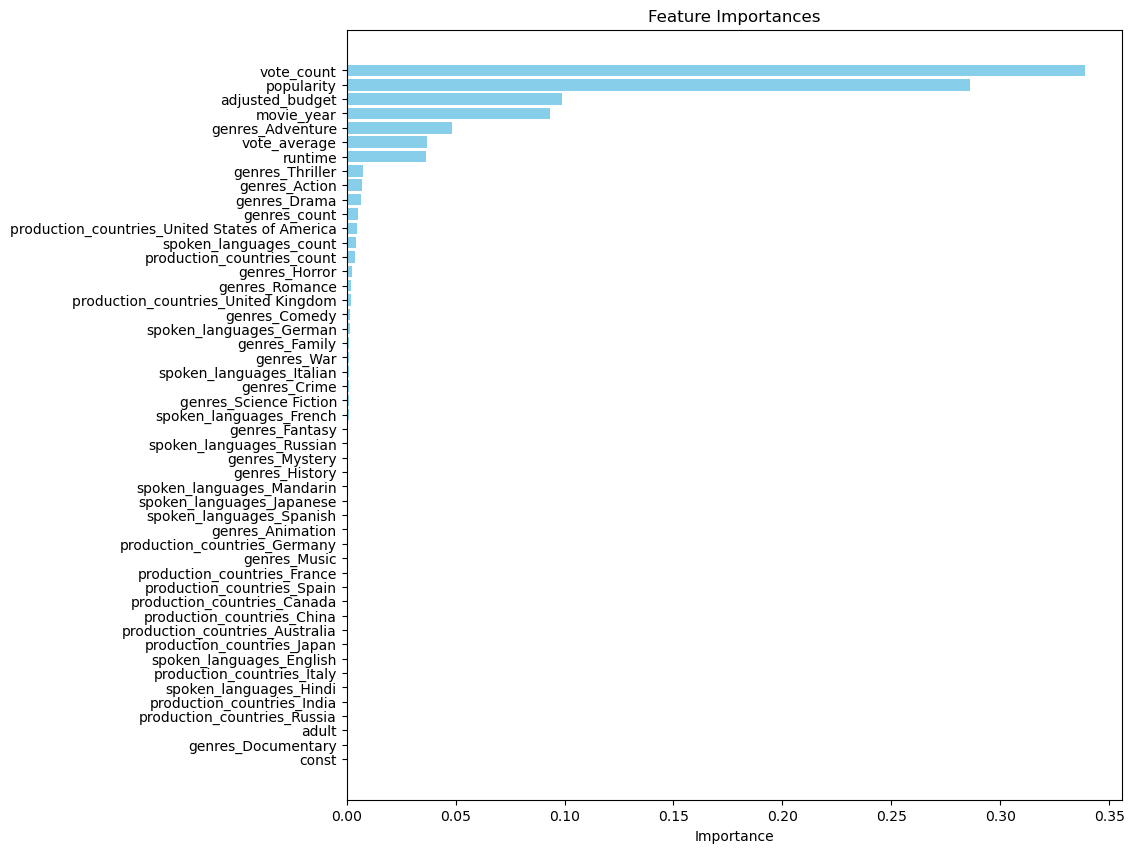

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train_based_on_book.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

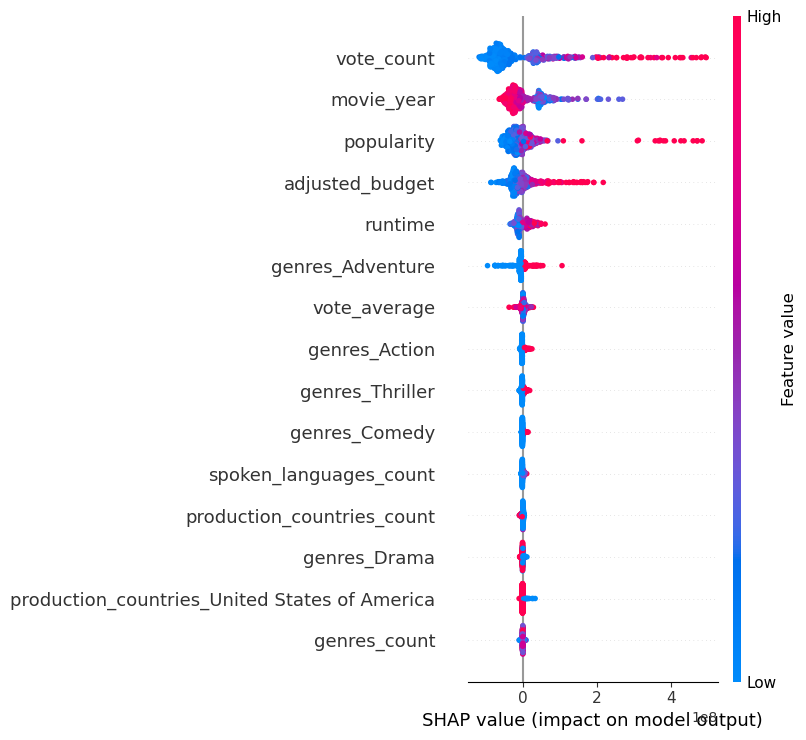

In [ ]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_based_on_book)

shap.summary_plot(shap_values, X_train_based_on_book, max_display=15)

### Not based on book

Here there is probably no need to redo the hyperparameter tuning since we can achieve a higher R^2 value already

In [15]:
best_model = RandomForestRegressor(bootstrap= True, max_depth= 15, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)
best_model.fit(X_train_not_based_on_book, y_train_not_based_on_book.ravel())

predictions = best_model.predict(X_test_not_based_on_book)
rmse = np.sqrt(mean_squared_error(y_test_not_based_on_book, predictions))
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test_not_based_on_book, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 102971122.03689921
R^2 Score: 0.6467403051029688


                                          Feature  Importance
2                                      vote_count    0.470275
7                                 adjusted_budget    0.213792
6                                      movie_year    0.144810
3                                         runtime    0.046782
5                                      popularity    0.031620
1                                    vote_average    0.024381
10                               genres_Adventure    0.018548
8                                    genres_count    0.007032
12                                  genres_Comedy    0.004937
22                                 genres_Romance    0.004538
26                         spoken_languages_count    0.004469
36                     production_countries_count    0.003796
23                         genres_Science Fiction    0.002840
16                                  genres_Family    0.002511
9                                   genres_Action    0.001847
11      

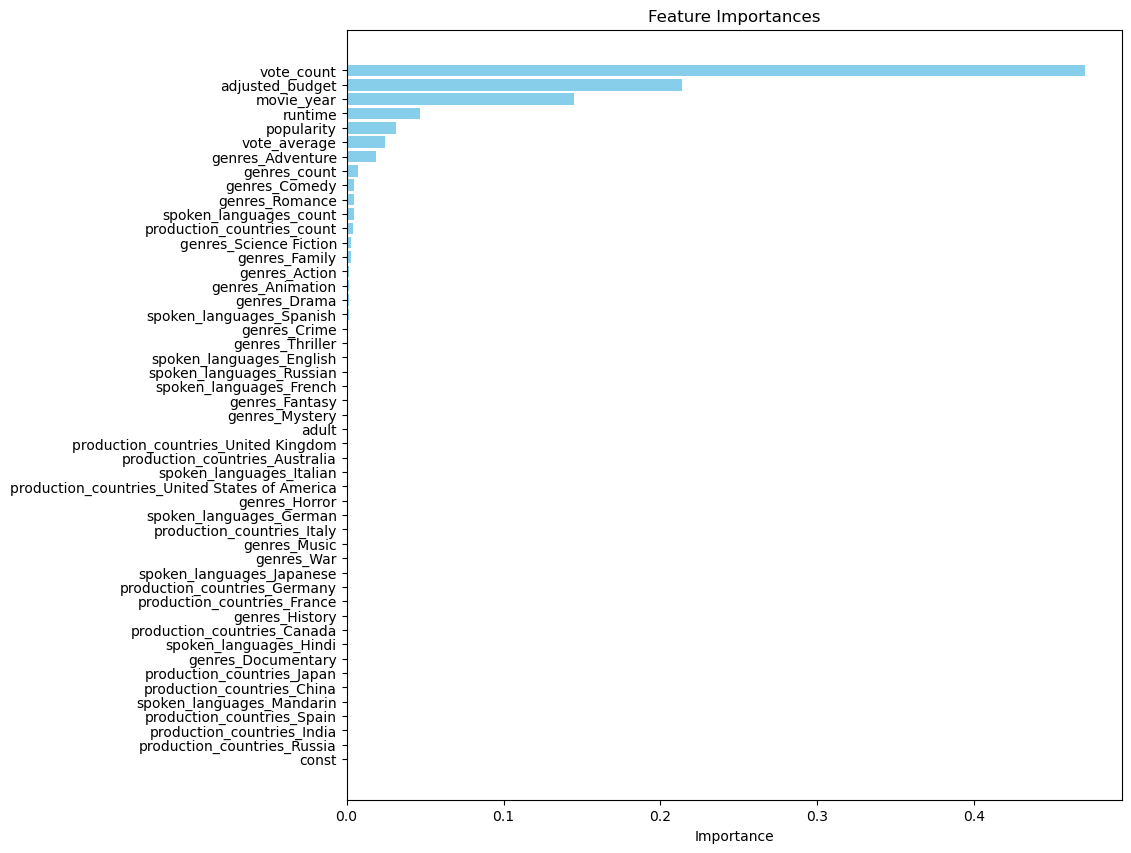

In [16]:
importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train_not_based_on_book.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

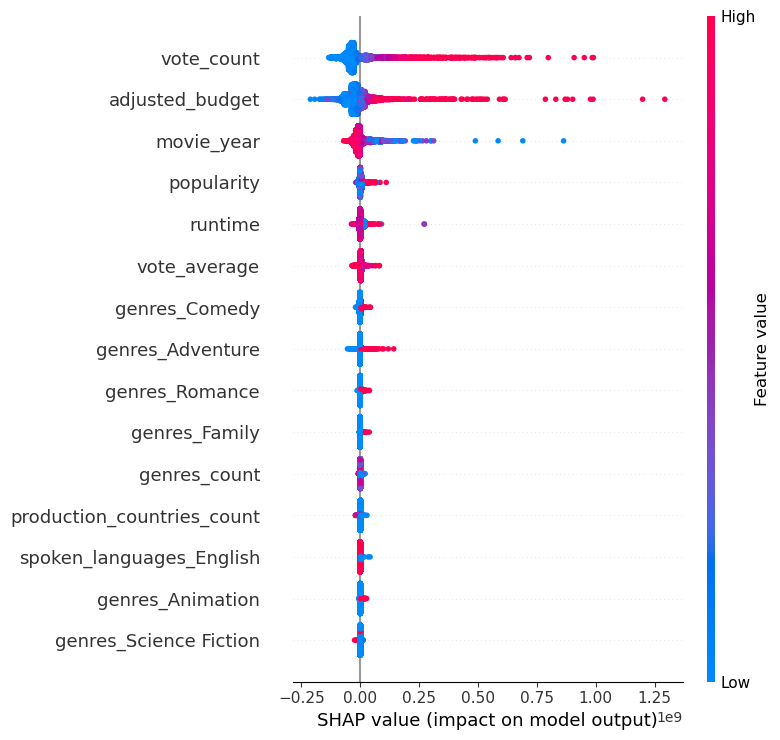

In [18]:

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_not_based_on_book)

shap.summary_plot(shap_values, X_train_not_based_on_book, max_display=15)
